Paola Della Foglia matr. 961014

Esercitazione 11

Esercizio 11.2

**Scopo**

Dobbiamo costruire e addestrare una rete neurale NN per adattare il seguente polinomio di ordine 3:

f(x)=4−3x−2x^2+3x^3   per x∈[−1,1]

Fittare un polinomio di 3° grado è ovviamente più complesso del problema precedente ( ex.11.1) in cui avevamo a che fare con un polinomio di 1° grado (caso semplice). 

Quindi per via della maggior complessità del problema utilizzeremo un numero più elevato di punti di train (2000) e di validazione (200)


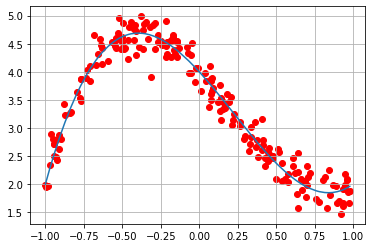

In [1]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = 4 - 3 * x_valid - 2 * x_valid**2 + 3 * x_valid**3 # ideal (target) 

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(4 - 3 * x_train - 2 * x_train**2 + 3 * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4 - 3 * x_valid - 2 * x_valid**2 + 3 * x_valid**3, sigma) 

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


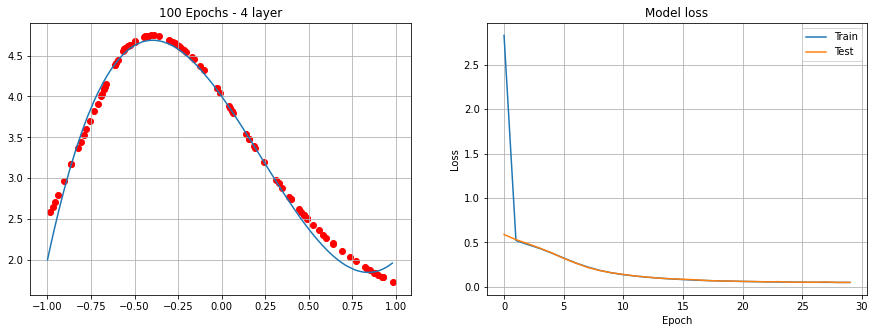

In [5]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='elu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=64, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('100 Epochs - 4 layer')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
ax[1].grid(True)
plt.show()

Con 3 layer nascosti otteniamo un'approssimazione abbastanza buona di $f(x)$. 
Se proviamo a prevedere valori per $f(x)$ al di fuori dell'intervallo [−1; 1] la NN non funziona. 

Questo accade perché l'abbiamo addestrata su alcuni punti ma non gli abbiamo fornito alcun metodo per capire come dovrebbe comportarsi per altri punti.


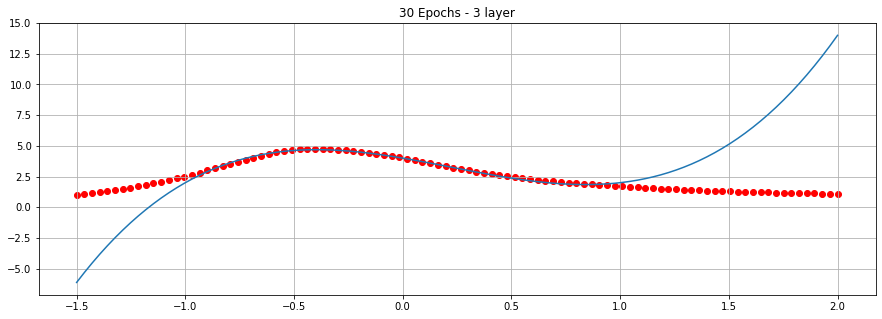

In [6]:
x_predicted = np.linspace(-1.5, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_predicted, 4.-3*x_predicted-2.*x_predicted**2+3.*x_predicted**3)
plt.grid(True)
plt.title('30 Epochs - 3 layer')
plt.show()

Ora possiamo cercare di capire cosa accade se usiamo un solo layer e più neuroni:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


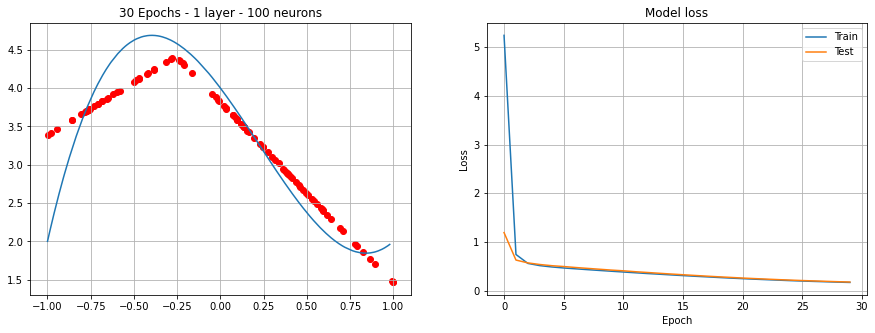

In [7]:
model = tf.keras.Sequential()
model.add(Dense(100, input_shape=(1,), activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=64, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('30 Epochs - 1 layer - 100 neurons')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
ax[1].grid(True)
plt.show()

Ciò che abbiamo ottenuto sopra è una pessima approssimazione di $f(x)$ dove abbiamo usato lo stesso numero di epoche. Per migliorare le NN potremmo aumentare il numero di epoche o il numero dei neuroni.

Applichiamo la seconda ipotesi di soluzione:


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1000)              2000      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


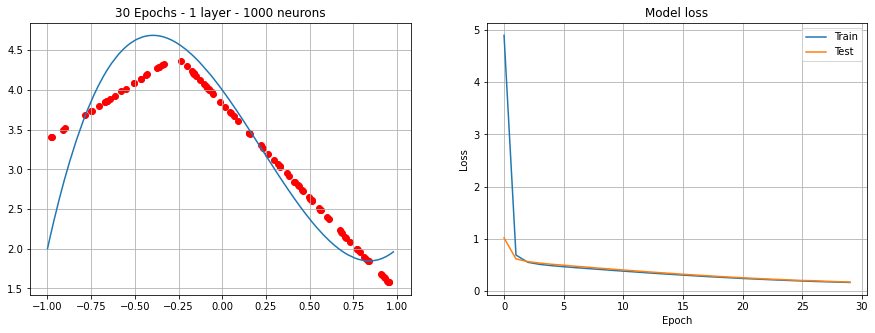

In [9]:
model = tf.keras.Sequential()
model.add(Dense(1000, input_shape=(1,), activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=64, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('30 Epochs - 1 layer - 1000 neurons')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
ax[1].grid(True)
plt.show()

**Funzione di attivazione**

Per la funzione di attivazione abbiamo optato per la **"relu"** perché dà i migliori risultati. 
Data una funzione di attivazione "tanh" otteniamo:



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1000)              2000      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


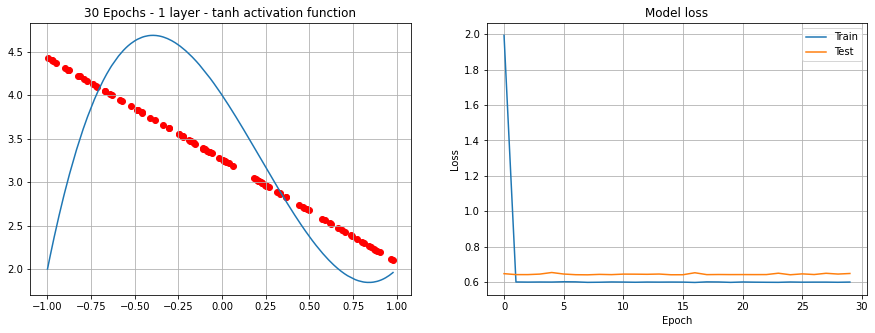

In [10]:
model = tf.keras.Sequential()
model.add(Dense(1000, input_shape=(1,), activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('30 Epochs - 1 layer - tanh activation function')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
ax[1].grid(True)
plt.show()

Abbiamo ottenuto un pessimo risultato. 
Se utilizzassimo più layer avremmo la possibilità di usufruire contemporaneamente di più funzioni di attivazione.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
________________________________________________________

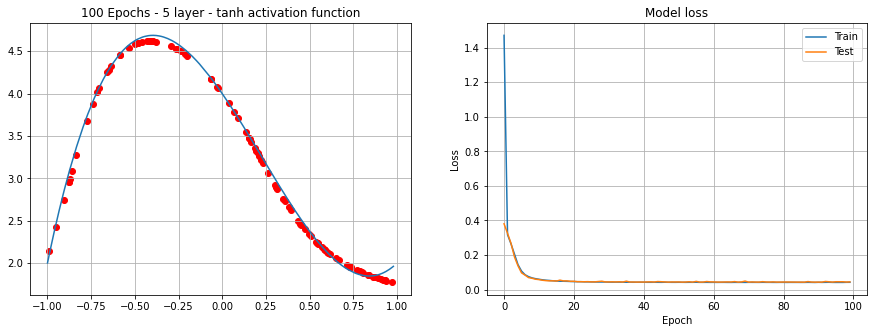

In [12]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose =0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('100 Epochs - 5 layer - tanh activation function')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
ax[1].grid(True)
plt.show()

Vediamo che usando 100 epoche e 5 layer con 10 neuroni in ciascuno con una funzione di attivazione tanh, otteniamo una previsione buona. 

Se x è vicino a 1 i punti rossi si allontanano di più dalla funzione blu, ciò è dovuto al fatto che $f (x)$ ha un minimo e quindi inizia ad aumentare quindi avremmo bisogno di più punti o più epoche per addestrare correttamente le NN.

**Funzione costo**

Possiamo usufruire di diverse funzioni costo: al posto dell'mse (mean square error) usiamo l'mae (mean absolute error).



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
________________________________________________________

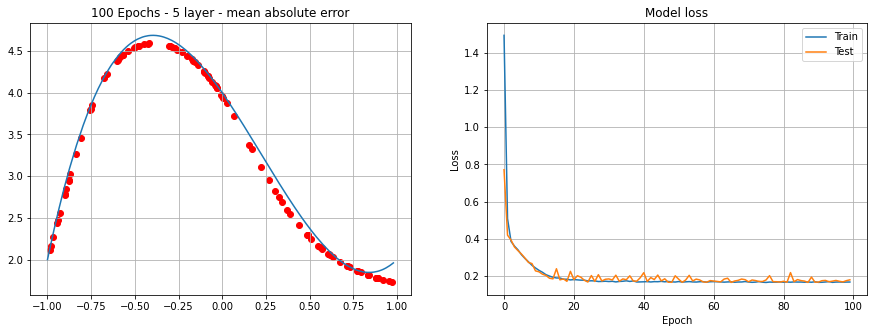

In [13]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mae', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose =0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('100 Epochs - 5 layer - mean absolute error')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
ax[1].grid(True)
plt.show()

La previsione per il mae non è buona quanto quella per l'errore quadratico medio (mse). 
Si potrebbero usare altre **funzioni costo** come l' errore percentuale assoluto medio o errore logaritmico assoluto medio, ma non danno buoni risultati. Altre funzioni di costo come l'entropia incrociata categoriale non sono adatte per questo tipo di problemi, ma per problemi di catalogazione.

**Ottimizzatore**

Possiamo usare altri ottimizzatori oltre allo stocastich gradient descent (sgd), come ad esempio il descent gradient dg o l' RMSprop.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
________________________________________________________

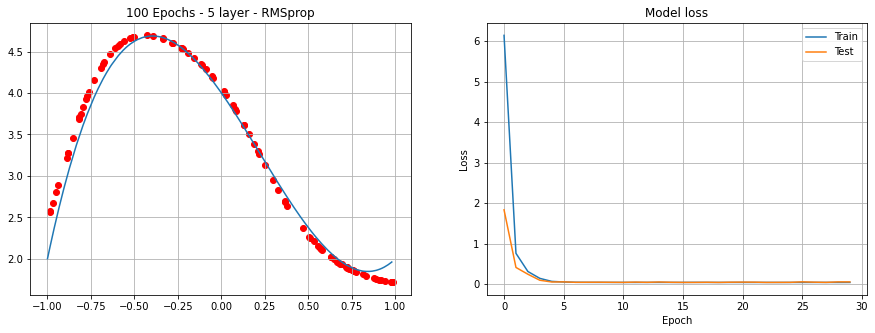

In [14]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='RMSprop', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose =0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('100 Epochs - 5 layer - RMSprop')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
ax[1].grid(True)
plt.show()

Dal primo grafico sopra si osserva che i valori e l'errore previsti sembrano molto buoni tranne che per valori delle x vicini a 1 ( oltre il punto di minimo).

**Conclusioni**

Ciò che abbiamo scoperto è che è più rapido addestrare una NN a molti strati (layer) rispetto a una che contiene solo un layer con molti neuroni. 
La **funzione di attivazione** dipende dal caso particolare di cui ci stiamo occupando: in questo caso la migliore è tanh. 
La migliore **funzione costo** per il nostro problema è la MSE, perché è un problema di adattamento, altre funzioni potrebbero essere migliori in altri problemi come quelli di catalogazione. Infine l'ottimizzatore sembra non giocare un ruolo importante, l'unica differenza tra loro è che alcuni richiedono più epoche per ottimizzare i parametri.